<a href="https://colab.research.google.com/github/uchihamadara37/ML-capstone-bangkit/blob/main/andre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi


/bin/bash: line 1: nvidia-smi: command not found


Setup Library
**Preprocessing**

In [ ]:
# prompt: install kaggle library

# !pip install kaggle


In [ ]:
# !kaggle datasets download -d wangziang/waste-pictures -p data --unzip

In [1]:
!wget "https://drive.usercontent.google.com/download?id=1AXuYOj63tdibRhEtOxI-kpEP6wBTMB56&export=download&authuser=0&confirm=t&uuid=9b208456-adaf-4b04-8b21-1d597c3f5e75&at=AENtkXZDhOKlhrjWsI2Owbxb63ix%3A1731726201156" -O trash_data.zip

--2024-11-22 01:04:46--  https://drive.usercontent.google.com/download?id=1AXuYOj63tdibRhEtOxI-kpEP6wBTMB56&export=download&authuser=0&confirm=t&uuid=9b208456-adaf-4b04-8b21-1d597c3f5e75&at=AENtkXZDhOKlhrjWsI2Owbxb63ix%3A1731726201156
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.210.132, 2607:f8b0:400c:c0f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.210.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 879645956 (839M) [application/octet-stream]
Saving to: ‘trash_data.zip’

trash_data.zip      100%[===================>] 838.90M   153MB/s    in 5.8s    

2024-11-22 01:04:54 (145 MB/s) - ‘trash_data.zip’ saved [879645956/879645956]



In [2]:
!unzip -o -q trash_data.zip -d data3

## **Exploratory Analysis**
First, I need to prepare all libraries needed for analysis.

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path

from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg

# untuk hunting file corrupt
from PIL import Image
import shutil

# untuk keperluan modeling
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2




In [4]:
root_dir = Path('./data3/resized_data')
train_dir = os.path.join(root_dir, 'train')
test_dir = os.path.join(root_dir, 'test')

In [ ]:
# Buat ngecek dir
# for entry in os.listdir(root_dir):
#     full_path = os.path.join(root_dir, entry)
#     if os.path.isdir(full_path):
#         print(f"|---->: {os.path.basename(full_path)}")
#         for entry2 in os.listdir(full_path):
#             full_path2 = os.path.join(full_path, entry2)
#             if os.path.isdir(full_path2):
#                 print(f"    |---->: {os.path.basename(full_path2)}")


### Installasi Tensorflow


In [ ]:
# !pip install tensorflow

#### Mengecek installasi tensorflow


In [ ]:
# !pip show tensorflow


In [ ]:
# !pip show matplotlib

In [ ]:
# def display_sample_images(base_dir, n_samples=3):

#     categories = os.listdir(base_dir)
#     n_categories = len(categories)

#     fig, axes = plt.subplots(n_categories, n_samples, figsize=(15, 3*n_categories))

#     for i, category in enumerate(categories):
#         # FullPath untuk setiap kategori folder
#         fullpath_category = os.path.join(base_dir, category)

#         # Mendapatkan semua file gambar dalam kategori
#         image_files = [f for f in os.listdir(fullpath_category)
#                       if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

#         # Mengambil 5 gambar secara random
#         selected_images = image_files[0:n_samples]

#         # Menampilkan gambar
#         for j, image_file in enumerate(selected_images):
#             img_path = os.path.join(fullpath_category, image_file)
#             try:
#                 img = mpimg.imread(img_path)
#                 # Plot gambar
#                 axes[i, j].imshow(img)
#                 axes[i, j].axis('off')

#                 # Menambahkan judul kategori hanya pada gambar pertama setiap baris
#                 if j == 0:
#                     axes[i, j].set_title(f'{category}', pad=10)
#             except Exception as e:
#                 print(f"Error loading image {img_path}: {str(e)}")

#                 # Untuk gambar yang error
#                 axes[i, j].text(0.5, 0.5, 'Error loading image',
#                               ha='center', va='center')
#                 axes[i, j].axis('off')

#                 continue


#     # plt.tight_layout()
#     plt.show()

# # Menampilkan sampel dari training set
# print("Sample images from training set:")
# display_sample_images(train_dir)

# # Menampilkan sampel dari test set
# print("\nSample images from test set:")
# display_sample_images(test_dir)

### **Membersihkan gambar corrupt terlebih dahulu**



In [ ]:
# import imghdr
# import re

# def is_unusual_name(name):
#     # Mendeteksi jika nama mengandung karakter selain alfanumerik dan underscore
#     # return bool(re.search(r'[^\x00-\x7F]', name) or re.search(r'[_\W]+', name))
#     return bool(re.search(r'[^\x00-\x7F]', name))

# def remove_corrupt_images(base_dir):
#    """
#    Menghapus gambar yang corrupt dari direktori dataset

#    Args:
#        base_dir: Directory utama dataset
#    """
#    corrupt_count = 0
#    total_images = 0
#    corrupt_files = []

#    print("Scanning for corrupt images...")

#    # Iterasi melalui semua folder dan subfolder
#    for root, dirs, files in os.walk(base_dir):
#        for dir in dirs:
#           #  print(dir)
#            if is_unusual_name(dir):
#                print("dir nama aneh :", dir, ": ", os.path.join(root, dir))
#                if os.path.exists(os.path.join(root, dir)):
#                   shutil.rmtree(os.path.join(root, dir))
#                   print("dir berhasil dihapus")


#        for filename in files:
#            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
#                total_images += 1
#                filepath = os.path.join(root, filename)

#                try:
#                    # Coba buka dan verifikasi gambar
#                   #  with Image.open(filepath) as img:
#                   #      img.verify()  # Verifikasi file
#                   #      img.load()    # Coba load pixel data

#                    # Verifikasi tambahan menggunakan imghdr
#                   #  if imghdr.what(filepath) is None:
#                   #      raise ValueError("File bukan gambar yang valid")
#                   img = mpimg.imread(filepath)


#                except Exception as e:
#                    corrupt_count += 1
#                    corrupt_files.append((filepath, str(e)))

#                    # Hapus file corrupt
#                    try:
#                        os.remove(filepath)
#                        print(f"Deleted corrupt file: {filepath}")
#                    except Exception as e:
#                        print(f"Error deleting {filepath}: {str(e)}")

#    # Print summary
#    print("\nPembersihan selesai!")
#    print(f"Total gambar diperiksa: {total_images}")
#    print(f"Gambar corrupt dihapus: {corrupt_count}")

#    if corrupt_files:
#        print("\nDaftar file yang dihapus:")
#        for path, error in corrupt_files:
#            print(f"- {path}")
#            print(f"  Error: {error}")

#    # Hitung jumlah gambar yang tersisa per kategori
#    print("\nJumlah gambar tersisa per kategori:")
#    for root, dirs, files in os.walk(base_dir):
#        category = os.path.basename(root)
#        if category:
#            image_count = len([f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
#            if image_count > 0:
#                print(f"{category}: {image_count} gambar")

#    return corrupt_files

### Saya start hapus yang corrupt

In [ ]:
# corrupt_files = remove_corrupt_images(root_dir)

In [ ]:
# jumlah file di masing2 folder
# def count_files_in_folders(root_dir):
#     folder_counts = {}

#     # Iterasi melalui semua item di root_dir
#     for item in os.listdir(root_dir):
#         item_path = os.path.join(root_dir, item)

#         # Jika item adalah folder
#         if os.path.isdir(item_path):
#             file_count = 0

#             # Hitung file di dalam folder
#             for _, _, files in os.walk(item_path):
#                 file_count += len(files)

#             folder_counts[item] = file_count

#     return folder_counts
# root_folder = 'data/train'

# # Hitung file
# result = count_files_in_folders(root_folder)

# # Tampilkan hasil
# print(f"Jumlah file di masing-masing folder dalam '{root_folder}':")
# for folder, count in result.items():
#     print(f"{folder}: {count} file")

In [ ]:
# # menghapus folder data dan seluruh isinya
# import shutil
# import os

# def delete_directory(path):
#     try:
#         # Periksa apakah direktori ada
#         if os.path.exists(path):
#             # Hapus direktori dan semua isinya
#             shutil.rmtree(path)
#             print(f"Direktori '{path}' berhasil dihapus beserta seluruh isinya.")
#         else:
#             print(f"Direktori '{path}' tidak ditemukan.")
#     except Exception as e:
#         print(f"Terjadi kesalahan saat menghapus direktori: {e}")



# # Panggil fungsi untuk menghapus direktori | hati2 sluurr...
# # delete_directory('data')

# # Verifikasi bahwa direktori telah dihapus
# if not os.path.exists('data2'):
#     print("Verifikasi: Direktori 'data' tidak ada lagi.")
# else:
#     print("Verifikasi: Direktori 'data' masih ada. Penghapusan mungkin gagal.")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# # import os
# # import shutil
# from tqdm import tqdm

# def copy_directory_structure(source_dir, destination_dir):
#     """
#     Menyalin seluruh struktur direktori dan file dari source ke destination
#     dengan progress bar
#     """
#     # Hitung total file yang akan disalin
#     total_files = sum([len(files) for _, _, files in os.walk(source_dir)])

#     print(f"Total files to copy: {total_files}")
#     print(f"From: {source_dir}")
#     print(f"To: {destination_dir}")

#     # Buat progress bar
#     pbar = tqdm(total=total_files, desc="Copying files")

#     # Iterasi melalui semua direktori dan file
#     for root, dirs, files in os.walk(source_dir):
#         # Buat struktur direktori yang sama di destination
#         relative_path = os.path.relpath(root, source_dir)
#         destination_path = os.path.join(destination_dir, relative_path)

#         # Buat direktori jika belum ada
#         if not os.path.exists(destination_path):
#             os.makedirs(destination_path)
#             print(f"\nCreated directory: {destination_path}")

#         # Salin semua file dalam direktori current
#         for file in files:
#             source_file = os.path.join(root, file)
#             destination_file = os.path.join(destination_path, file)

#             try:
#                 shutil.copy2(source_file, destination_file)
#                 pbar.update(1)
#             except Exception as e:
#                 print(f"\nError copying {source_file}: {str(e)}")

#     pbar.close()

#     # Verifikasi hasil copy
#     def count_files(directory):
#         return sum([len(files) for _, _, files in os.walk(directory)])

#     source_count = count_files(source_dir)
#     dest_count = count_files(destination_dir)

#     print("\nCopy completed!")
#     print(f"Files in source: {source_count}")
#     print(f"Files in destination: {dest_count}")

#     # Tampilkan struktur folder hasil copy
#     print("\nDestination directory structure:")
#     for root, dirs, files in os.walk(destination_dir):
#         level = root.replace(destination_dir, '').count(os.sep)
#         indent = ' ' * 4 * level
#         print(f"{indent}{os.path.basename(root)}/")
#         subindent = ' ' * 4 * (level + 1)
#         for f in files:
#             print(f"{subindent}{f}")

# # Source dan destination directories
# source_dir = 'data'
# destination_dir = '/content/drive/MyDrive/trash_data_not_corrupt_insyaAllah'

# # Pastikan Google Drive sudah dimount
# # from google.colab import drive
# # drive.mount('/content/drive')

# # Jalankan fungsi copy
# copy_directory_structure(source_dir, destination_dir)

In [ ]:
# import os
# import zipfile
# import shutil
# from tqdm import tqdm
# from google.colab import drive

# def create_and_copy_zip(source_dir, zip_name, destination_dir):
#     """
#     Membuat file zip dari folder dan menyalinnya ke Google Drive
#     """
#     print("Mounting Google Drive...")
#     drive.mount('/content/drive')

#     # Hitung total file untuk progress bar
#     total_files = sum([len(files) for _, _, files in os.walk(source_dir)])
#     print(f"\nTotal files to compress: {total_files}")

#     # Buat zip file
#     print(f"\nCreating {zip_name}...")
#     with zipfile.ZipFile(zip_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
#         # Gunakan progress bar
#         with tqdm(total=total_files, desc="Compressing files") as pbar:
#             for root, dirs, files in os.walk(source_dir):
#                 # Get path relative to source_dir
#                 rel_path = os.path.relpath(root, source_dir)

#                 # Add each file to zip
#                 for file in files:
#                     file_path = os.path.join(root, file)
#                     # Add file ke zip dengan menjaga struktur folder
#                     arcname = os.path.join(os.path.basename(source_dir),
#                                          rel_path, file)
#                     try:
#                         zipf.write(file_path, arcname)
#                         pbar.update(1)
#                     except Exception as e:
#                         print(f"\nError adding {file_path}: {str(e)}")

#     # Get zip file size
#     zip_size = os.path.getsize(zip_name) / (1024 * 1024)  # Convert to MB
#     print(f"\nZip file created: {zip_name} ({zip_size:.2f} MB)")

#     # Copy zip ke Google Drive
#     print(f"\nCopying {zip_name} to Google Drive...")
#     try:
#         shutil.copy2(zip_name, destination_dir)
#         print(f"Successfully copied to: {destination_dir}")

#         # Verifikasi file ada di drive
#         dest_path = os.path.join(destination_dir, zip_name)
#         if os.path.exists(dest_path):
#             dest_size = os.path.getsize(dest_path) / (1024 * 1024)
#             print(f"Verified: File exists in drive ({dest_size:.2f} MB)")
#         else:
#             print("Warning: File not found in destination!")

#     except Exception as e:
#         print(f"Error copying to drive: {str(e)}")

#     # Optional: Hapus zip file lokal setelah copy
#     # try:
#     #     os.remove(zip_name)
#     #     print(f"Cleaned up: Removed local {zip_name}")
#     # except Exception as e:
#     #     print(f"Error removing local zip: {str(e)}")

# # Gunakan fungsi
# source_dir = 'data2/data'
# zip_name = 'trash_data.zip'
# destination_dir = '/content/drive/MyDrive'

# create_and_copy_zip(source_dir, zip_name, destination_dir)

# # Verifikasi isi zip
# def verify_zip_contents(zip_path):
#     print("\nVerifying zip contents:")
#     try:
#         with zipfile.ZipFile(os.path.join(destination_dir, zip_name), 'r') as zipf:
#             # Hitung file dalam zip
#             total_files = len(zipf.namelist())
#             print(f"Total files in zip: {total_files}")

#             # Tampilkan struktur folder dalam zip
#             print("\nZip contents structure:")
#             folders = {}
#             for name in zipf.namelist():
#                 parts = name.split('/')
#                 current = folders
#                 for part in parts[:-1]:  # Skip file name
#                     if part not in current:
#                         current[part] = {}
#                     current = current[part]

#             # Print struktur folder
#             def print_tree(d, indent=0):
#                 for k, v in d.items():
#                     print('  ' * indent + k + '/')
#                     print_tree(v, indent + 1)

#             print_tree(folders)

#     except Exception as e:
#         print(f"Error verifying zip: {str(e)}")

# # Verifikasi zip setelah copy
# verify_zip_contents(os.path.join(destination_dir, zip_name))

In [ ]:
# !cp trash_data.zip "/content/drive/MyDrive/"


## Mulai menuju modeling (masih ada preprocessing)


In [7]:
# Tentukan ukuran gambar yang konsisten
IMG_HEIGHT = 120
IMG_WIDTH = 120
BATCH_SIZE = 32

## Yang dari Module Coursera CNN


Menyiapkan suffle (pengacakan) dan juga prefetch (pengambilan model langsung ketika training).

In [5]:
# pengacakan dan prefetch
SUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

In [8]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True,
    label_mode='categorical',
    seed=40
)

Found 17794 files belonging to 34 classes.


### buat test


In [9]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,

    shuffle=False,
    label_mode='categorical',
    seed=3
)

Found 5726 files belonging to 34 classes.


### Diambil dikit buat val_

In [10]:
val_size = tf.data.experimental.cardinality(val_dataset)
print("val size ", val_size.numpy())
test_size = val_size // 8  # Mengambil 20% untuk validation

val_ds = val_dataset.skip(test_size)
test_dataset = val_dataset.take(test_size)

print(val_ds)
print(test_dataset)
print("Jumlah elemen di train_dataset:", tf.data.experimental.cardinality(train_dataset).numpy())
print("Jumlah elemen di val_ds:", tf.data.experimental.cardinality(val_ds).numpy())
print("Jumlah elemen di test_dataset:", tf.data.experimental.cardinality(test_dataset).numpy())

val size  179
<_SkipDataset element_spec=(TensorSpec(shape=(None, 120, 120, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 34), dtype=tf.float32, name=None))>
<_TakeDataset element_spec=(TensorSpec(shape=(None, 120, 120, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 34), dtype=tf.float32, name=None))>
Jumlah elemen di train_dataset: 557
Jumlah elemen di val_ds: 157
Jumlah elemen di test_dataset: 22


In [11]:
train_dataset_final = train_dataset.cache().shuffle(
    SUFFLE_BUFFER_SIZE,
    reshuffle_each_iteration=False
).prefetch(PREFETCH_BUFFER_SIZE)

validation_dataset_final = val_ds.cache().prefetch(PREFETCH_BUFFER_SIZE)

# train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
# val_ds = val_ds.cache().prefetch(AUTOTUNE)
test_dataset_final = test_dataset.cache().prefetch(PREFETCH_BUFFER_SIZE)

## Nyoba Buat Model


In [23]:
models = tf.keras.models
layers = tf.keras.layers


# model = tf.keras.models.Sequential([
#     # menyesuaikan ukuran dimensi gambar + 3 rgb
#     tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

#     # augmen
#     tf.keras.layers.RandomFlip("horizontal"),
#     tf.keras.layers.RandomRotation(0.2),
#     tf.keras.layers.RandomZoom(0.2),
#     #
#     tf.keras.layers.Rescaling(1./255),
#     tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # diflatten untuk mendapatkan matriks 2 dimensi lagi
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64,
#                           activation='relu',
#                           # kernel_regularizer=regularizers.l2(0.01)
#                           ),
#     tf.keras.layers.Dropout(0.1),
#     tf.keras.layers.Dense(34, activation='softmax')
# ])

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

    # Augmentasi yang lebih agresif
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2, fill_mode="nearest"),
    tf.keras.layers.RandomZoom(0.2, fill_mode="nearest"),
    tf.keras.layers.RandomTranslation(0.2, 0.2, fill_mode="nearest"),
    tf.keras.layers.RandomBrightness(0.2,),
    tf.keras.layers.RandomContrast(0.2),

    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Conv2D(16, (3, 3), activation="relu"),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    # tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_regularizer=l2(0.001)),
    # tf.keras.layers.BatchNormalization()
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    # tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_regularizer=l2(0.001)),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    # tf.keras.layers.Conv2D(512, (3, 3), activation="relu", kernel_regularizer=l2(0.001)),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),


    tf.keras.layers.Flatten(),

    # Dense layers dengan regularisasi yang lebih kuat
    tf.keras.layers.Dense(512,),

    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    # tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(34, activation='softmax')
])


# model = models.Sequential([
#     tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

#     # Augmentasi yang lebih agresif
#     tf.keras.layers.RandomFlip("horizontal_and_vertical"),
#     tf.keras.layers.RandomRotation(0.3),
#     tf.keras.layers.RandomZoom(0.3),
#     tf.keras.layers.RandomBrightness(0.2),
#     tf.keras.layers.RandomContrast(0.2),

#     tf.keras.layers.Rescaling(1./255),
#     layers.GlobalAveragePooling2D(),
#     layers.Dropout(0.2),
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(34, activation='softmax')
#     ])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip_3 (RandomFlip)           │ (None, 120, 120, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_3 (RandomRotation)   │ (None, 120, 120, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_3 (RandomZoom)           │ (None, 120, 120, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_translation_3                 │ (None, 120, 120, 3)         │               0 │
│ (RandomTranslation)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_brightness_1                  │ (None, 120, 120, 3)         │               0 │
│ (RandomBrightness)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_contrast_1 (RandomContrast)   │ (None, 120, 120, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (None, 120, 120, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 118, 118, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 59, 59, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 57, 57, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 26, 26, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 3, 3, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 330,562 (1.26 MB)

 Trainable params: 329,538 (1.26 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [38]:
initial_lr = 0.001
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_lr,
#     decay_steps=1000,
#     decay_rate=0.9
# )

# compile dahulu
# model.compile(
#     optimizer=tf.keras.optimizers.RMSprop(learning_rate=1.75e-4, ),
#     loss='categorical_crossentropy',
#     metrics=['accuracy'],
# )

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.008),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [34]:
# untuk mencari learning rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.00001
)


In [39]:
history = model.fit(
    train_dataset_final,
    validation_data=validation_dataset_final,
    epochs=120,
    verbose=2,
    callbacks=[]
)

Epoch 1/120
557/557 - 11s - 19ms/step - accuracy: 0.3151 - loss: 2.5024 - val_accuracy: 0.3160 - val_loss: 2.5153
Epoch 2/120
557/557 - 9s - 15ms/step - accuracy: 0.3315 - loss: 2.3958 - val_accuracy: 0.3136 - val_loss: 2.5947
Epoch 3/120
557/557 - 9s - 16ms/step - accuracy: 0.3476 - loss: 2.3369 - val_accuracy: 0.3084 - val_loss: 2.4451
Epoch 4/120
557/557 - 9s - 16ms/step - accuracy: 0.3474 - loss: 2.3197 - val_accuracy: 0.3112 - val_loss: 2.4208
Epoch 5/120
557/557 - 9s - 16ms/step - accuracy: 0.3546 - loss: 2.3000 - val_accuracy: 0.3294 - val_loss: 2.4177
Epoch 6/120
557/557 - 9s - 16ms/step - accuracy: 0.3612 - loss: 2.2758 - val_accuracy: 0.3170 - val_loss: 2.4972
Epoch 7/120
557/557 - 10s - 17ms/step - accuracy: 0.3644 - loss: 2.2640 - val_accuracy: 0.3572 - val_loss: 2.2774
Epoch 8/120
557/557 - 9s - 15ms/step - accuracy: 0.3625 - loss: 2.2499 - val_accuracy: 0.3483 - val_loss: 2.3189
Epoch 9/120
557/557 - 9s - 15ms/step - accuracy: 0.3766 - loss: 2.2312 - val_accuracy: 0.3911 

In [40]:
loss, accuracy = model.evaluate(test_dataset)
print("Accuracy", accuracy)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6264 - loss: 1.3161
Accuracy 0.6079545617103577


In [19]:

def plot_loss_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(len(acc))

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
  ax1.plot(epochs_range, acc, label='Training Accuracy')
  ax1.plot(epochs_range, val_acc, label='Validation Accuracy')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Accuracy')
  ax1.set_title('Training and Validation Accuracy')
  ax1.legend()

  ax2.plot(epochs_range, loss, label='Training Loss')
  ax2.plot(epochs_range, val_loss, label='Validation Loss')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Loss')
  ax2.set_title('Training and Validation Loss')
  ax2.legend()

  plt.tight_layout()
  plt.show()



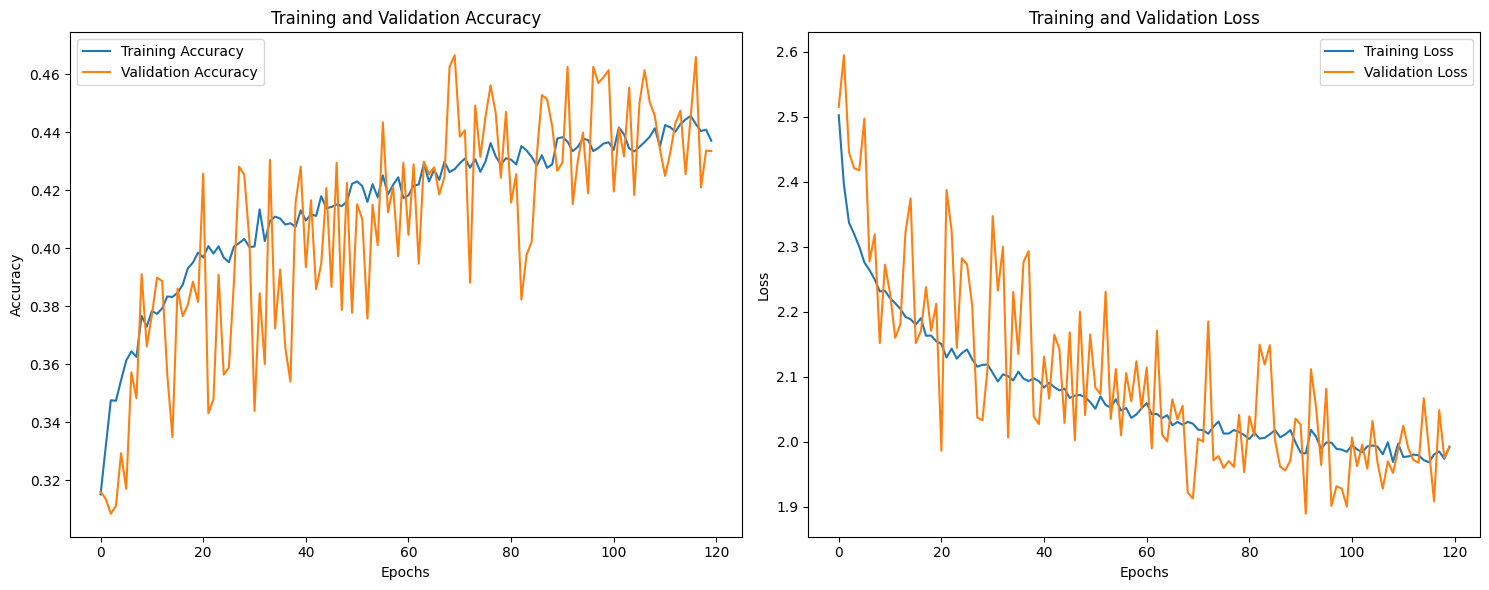

In [41]:
plot_loss_acc(history)

In [ ]:
print(f'Training Accuracy: {history.history["accuracy"][-1]*100:.2f}%')
print(f'Validation Accuracy: {history.history["val_accuracy"][-1]*100:.2f}%')

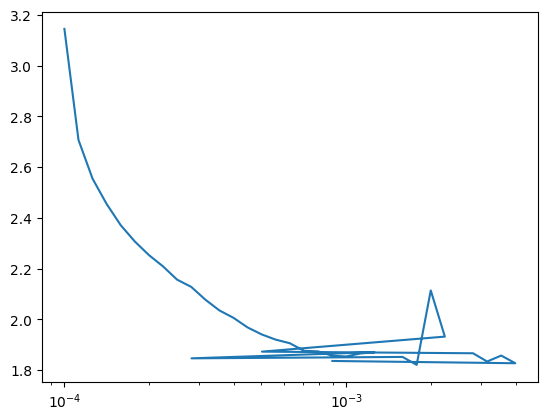

In [ ]:
plt.semilogx(history.history['learning_rate'], history.history['loss'])
# plt.semilogx(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.title('Training and Validation Loss')